## Exploratory Data Analysis:

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          467 non-null    object 
 1   Team          467 non-null    object 
 2   Home/Away     467 non-null    object 
 3   Opp           467 non-null    object 
 4   MP_G          467 non-null    int64  
 5   FG_G          467 non-null    int64  
 6   FGA_G         467 non-null    int64  
 7   FG%_G         467 non-null    float64
 8   3P_G          467 non-null    int64  
 9   3PA_G         467 non-null    int64  
 10  3P%_G         467 non-null    float64
 11  FT_G          467 non-null    int64  
 12  FTA_G         467 non-null    int64  
 13  FT%_G         467 non-null    float64
 14  ORB_G         467 non-null    int64  
 15  DRB_G         467 non-null    int64  
 16  TRB_G         467 non-null    int64  
 17  AST_G         467 non-null    int64  
 18  STL_G         467 non-null    

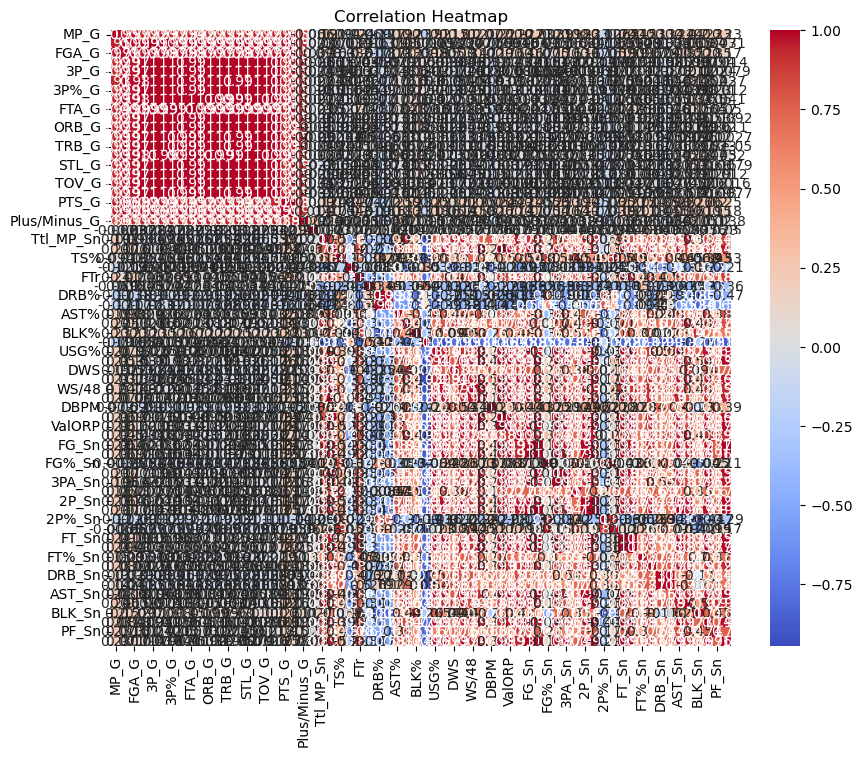

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Too many features here, let's cut it down a bit more and just look at averages and percentages

In [5]:
df.columns

Index(['Date', 'Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G',
       '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G',
       'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Ratio', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Pos', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn',
       '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn',
       'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn',
       'TOV_Sn', 'PF_Sn', 'PTS_Sn'],
      dtype='object')

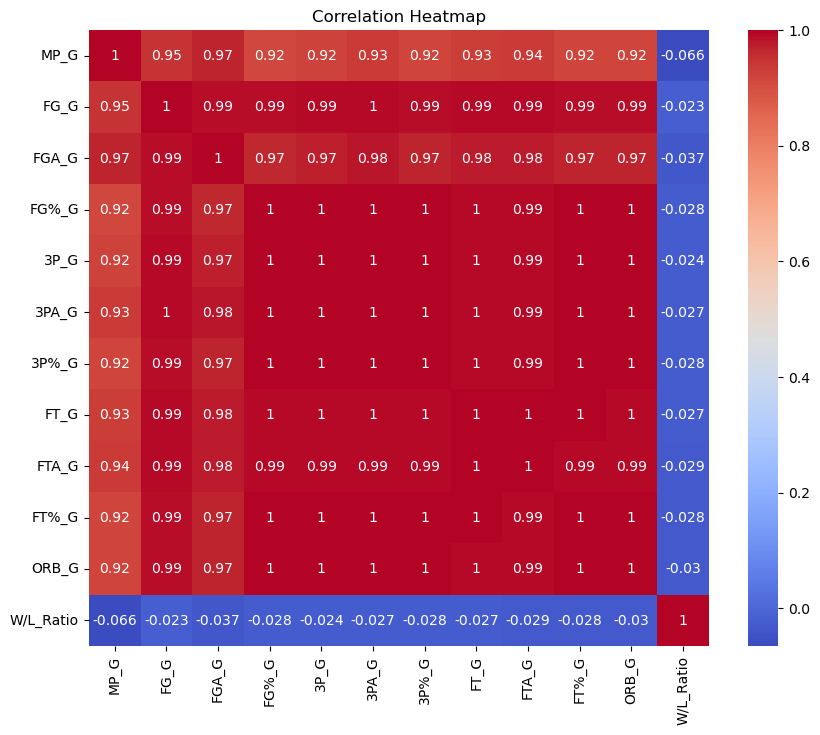

In [8]:
subset_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G',
       '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'W/L_Ratio']

plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_features].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

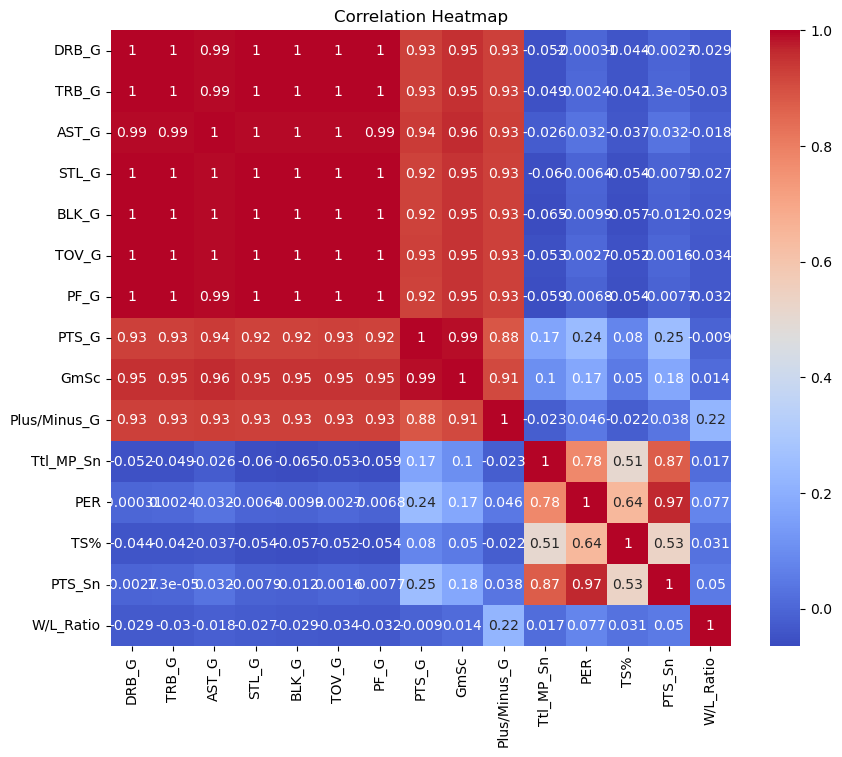

In [9]:
subset_2 = ['DRB_G',
       'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', 'PTS_Sn', 'W/L_Ratio']

plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_2].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Plus- Minus  low correlation with target
All of the per game stats have a high correlation with each other



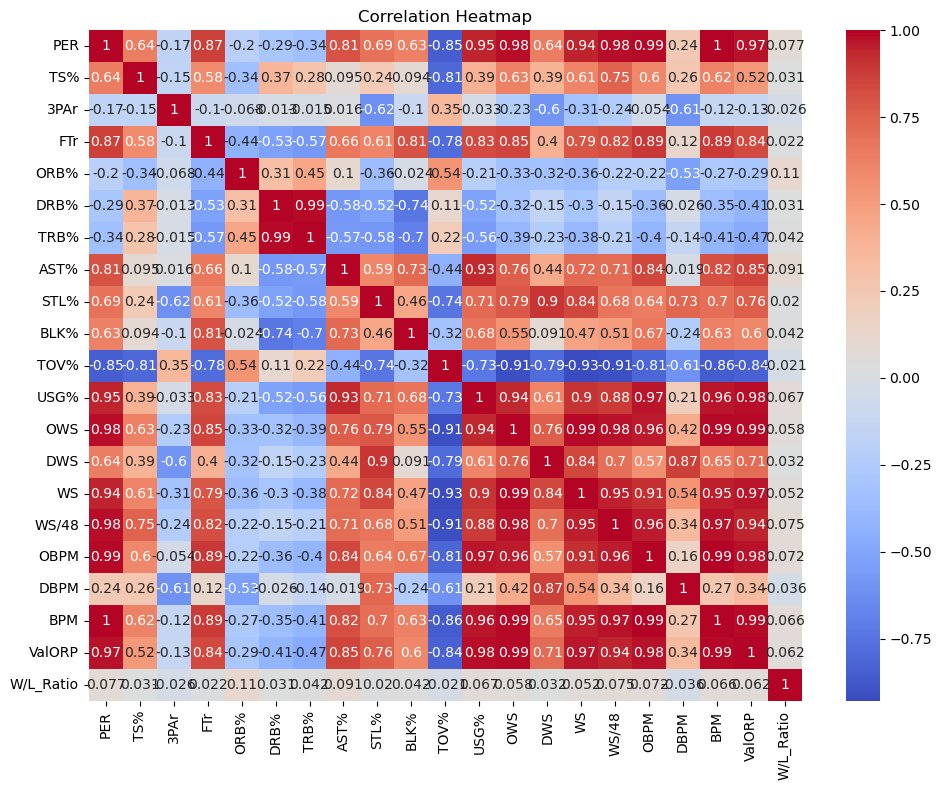

In [12]:
adv_stats_corr = ['PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'W/L_Ratio']

plt.figure(figsize=(10, 8))
sns.heatmap(df[adv_stats_corr].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

- Advanced stas have low correlation with target
- PER has high correlation with a couple of other advanced stats. Makes sense because PER is an impact stat
- I will give the features to the feature seletor and hyper tune my model this way


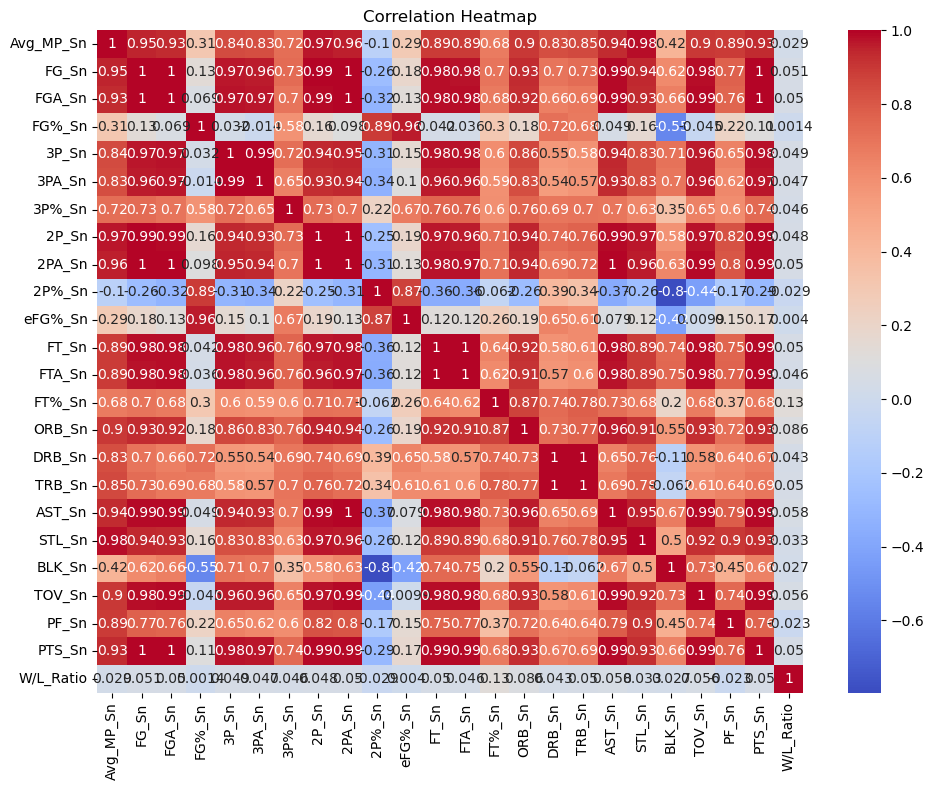

In [14]:
seasonal_corr = ['Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn',
       '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn',
       'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn',
       'TOV_Sn', 'PF_Sn', 'PTS_Sn', 'W/L_Ratio']

plt.figure(figsize=(10, 8))
sns.heatmap(df[seasonal_corr].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

None of the stats have a high correlation with the target